In [1]:
import os
import re
import pickle

In [2]:
import jax.numpy as jnp

In [3]:
import matplotlib.pyplot as plt

plt.style.use('classic')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

In [4]:
loss_dir = 'rmse-loss'

In [5]:

exp_dir = os.path.join('./experiment') #, loss_dir)
fig_dir = os.path.join(exp_dir, 'figs')
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [6]:
experiment_dirs = [
    '20220316-noise-0.1',
    '20220316-noise-0.25',
    # '20220315-noise-1',
    # '20220315-noise-5',
    # '20220315-noise-10',
]

In [7]:
results = {}
for d in experiment_dirs:
    file_path = os.path.join(exp_dir, d, 'results', 'loss.pkl')
    sigma = float(re.sub('^(.*)(noise-)','',d))
    with open(file_path, 'rb') as f:
        res = pickle.load(f)
    res = res['test']
    data = {k:jnp.mean(jnp.asarray(vs[-100:])).item() for k,vs in res.items()}
    results[sigma] = data

In [10]:
def plot_approx_rank_curve(results, title):
    for sigma, data in results.items():
        x, y = zip(*data.items())
        plt.plot(x, y, 'o-', label=r'$\epsilon={}\%$'.format(sigma*100), linewidth=3)
        plt.grid(True)
        plt.xlabel('Approximation Rank', fontsize=20)
        plt.ylabel('Risk', fontsize=20)
        plt.legend()
        plt.title(title, fontsize=24)
        plt.savefig(os.path.join(fig_dir, f'approx-rank-curve-{title.lower()}-all.png'))
    plt.show()

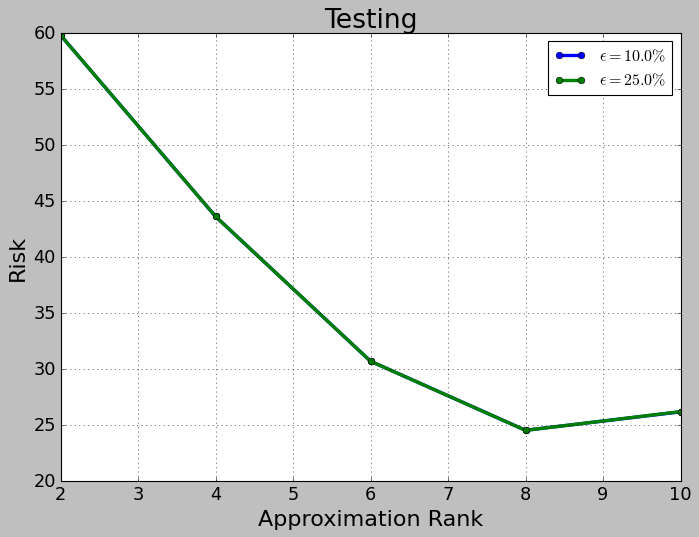

In [11]:
plt.rcParams["figure.figsize"] = (10,7)

# plot_approx_rank_curve(results, title='Testing: $x \sim \mathcal{N}(\mu=0,\sigma=\epsilon*1)$')
plot_approx_rank_curve(results, title='Testing')